# Machine Learning Module
# Group 4
# Heart Attack Analysis & Prediction Dataset

## Setup
Install all required on your machine (venv)

- Run the following command in your terminal:
```
pip install -r requirements.txt
```
- or Run code cell below:

In [1]:
!pip install -r requirements.txt

  Obtaining dependency information for anyio==4.1.0 from https://files.pythonhosted.org/packages/85/4f/d010eca6914703d8e6be222165d02c3e708ed909cdb2b7af3743667f302e/anyio-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for argon2-cffi==23.1.0 from https://files.pythonhosted.org/packages/a4/6a/e8a041599e78b6b3752da48000b14c8d1e8a04ded09c88c714ba047f34f5/argon2_cffi-23.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for arrow==1.3.0 from https://files.pythonhosted.org/packages/f8/ed/e97229a566617f2ae958a6b13e7cc0f585470eac730a73e9e82c32a3cdd2/arrow-1.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for async-lru==2.0.4 from https://files.pythonhosted.org/packages/fa/9f/3c3503693386c4b0f245eaf5ca6198e3b28879ca0a40bde6b0e319793453/async_lru-2.0.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 1.6 MB/s eta 0:00:00
  Obtaining depend


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# all imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import mutual_info_regression
from numpy import interp
from sklearn.metrics import roc_curve, auc

In [3]:
# get work-data
data = pd.read_csv('data/raw_dataset/heart.csv')

# training data & target data
data_training = data.drop(columns=['output'])
target_data = data['output']

print('Dataset:')
print(f'Total length: {len(data)}')
print(f'Amount Attributes: {len(data.columns)} \n')
print('Details: ')
display(data, data.describe())

Dataset:
Total length: 303
Amount Attributes: 14 

Details: 


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Nature of data


## Age

- **Distribution:** Appears to be somewhat normally distributed, skewing slightly towards older ages.
- **Type:** Numerical.
- **Description:** Represents the age of the patient, which varies across a wide range.

## Sex

- **Distribution:** Two distinct categories, indicative of a binary variable.
- **Type:** Categorical (Binary).
- **Description:** Denotes the sex of the patient, encoded as 1 or 0.

## Chest Pain (cp)

- **Distribution:** Categorical with four distinct values, not evenly distributed.
- **Type:** Categorical.
- **Description:** Represents different types of chest pain, ranging from typical angina to asymptomatic.

## Resting Blood Pressure (trtbps)

- **Distribution:** Shows a near-normal distribution.
- **Type:** Numerical.
- **Description:** Measures the resting blood pressure in mm Hg.

## Cholesterol (chol)

- **Distribution:** Slightly skewed normal distribution.
- **Type:** Numerical.
- **Description:** Represents cholesterol levels in mg/dl.

## Fasting Blood Sugar (fbs)

- **Distribution:** Binary categorical distribution.
- **Type:** Categorical (Binary).
- **Description:** Indicates if fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false).

## Resting Electrocardiographic Results (restecg)

- **Distribution:** Categorical distribution with three categories.
- **Type:** Categorical.
- **Description:** Shows the type of resting electrocardiographic results, from normal to left ventricular hypertrophy.

## Maximum Heart Rate (thalachh)

- **Distribution:** Appears somewhat normally distributed.
- **Type:** Numerical.
- **Description:** Indicates the maximum heart rate achieved by the patient.

## Exercise Induced Angina (exng)

- **Distribution:** Binary categorical distribution.
- **Type:** Categorical (Binary).
- **Description:** Indicates whether exercise induces angina (1 = yes, 0 = no).

## ST Depression (oldpeak)

- **Distribution:** Right-skewed distribution.
- **Type:** Numerical.
- **Description:** Represents the ST depression induced by exercise relative to rest.

## Slope of the Peak Exercise ST Segment (slp)

- **Distribution:** Categorical with three distinct values.
- **Type:** Categorical.
- **Description:** Reflects the slope of the peak exercise ST segment.

## Number of Major Vessels (caa)

- **Distribution:** Categorical, mostly concentrated on lower values.
- **Type:** Ordinal.
- **Description:** Denotes the number of major vessels colored by fluoroscopy, ranging from 0 to 3.

## Thalassemia (thall)

- **Distribution:** Categorical with a few distinct values.
- **Type:** Categorical.
- **Description:** Represents different types of thalassemia.

## Heart Attack Chance (output)

- **Distribution:** Binary categorical distribution.
- **Type:** Categorical (Binary).
- **Description:** Indicates the chance of a heart attack (1 = higher chance, 0 = lower chance)

## Visualize the distribution of attributes

Plots for numerical features


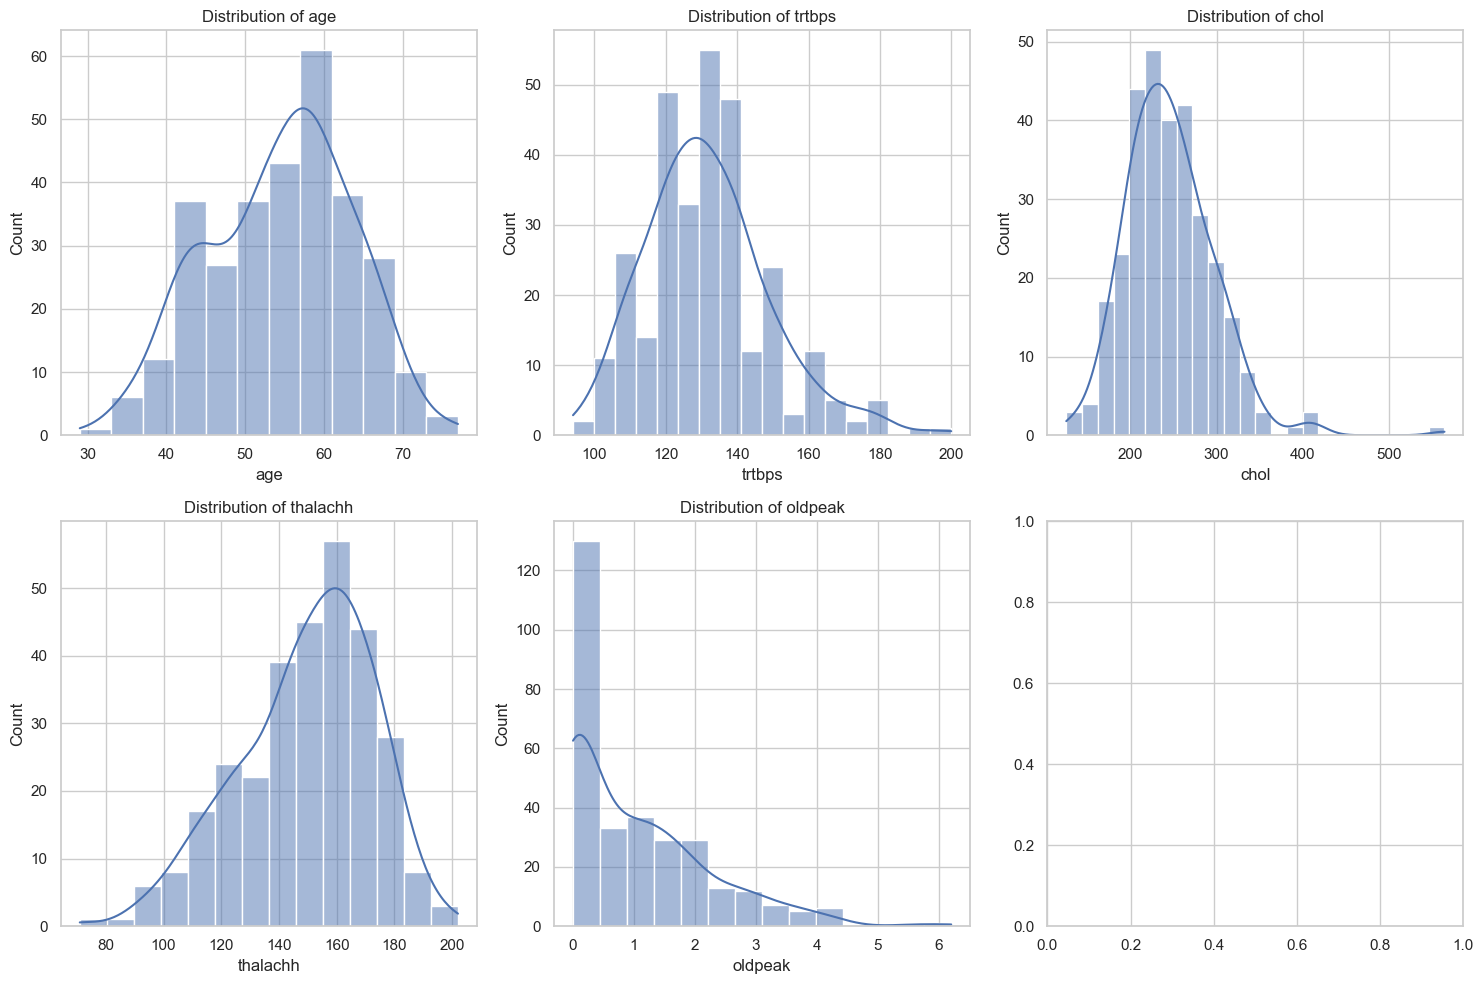

Plots for categorical features


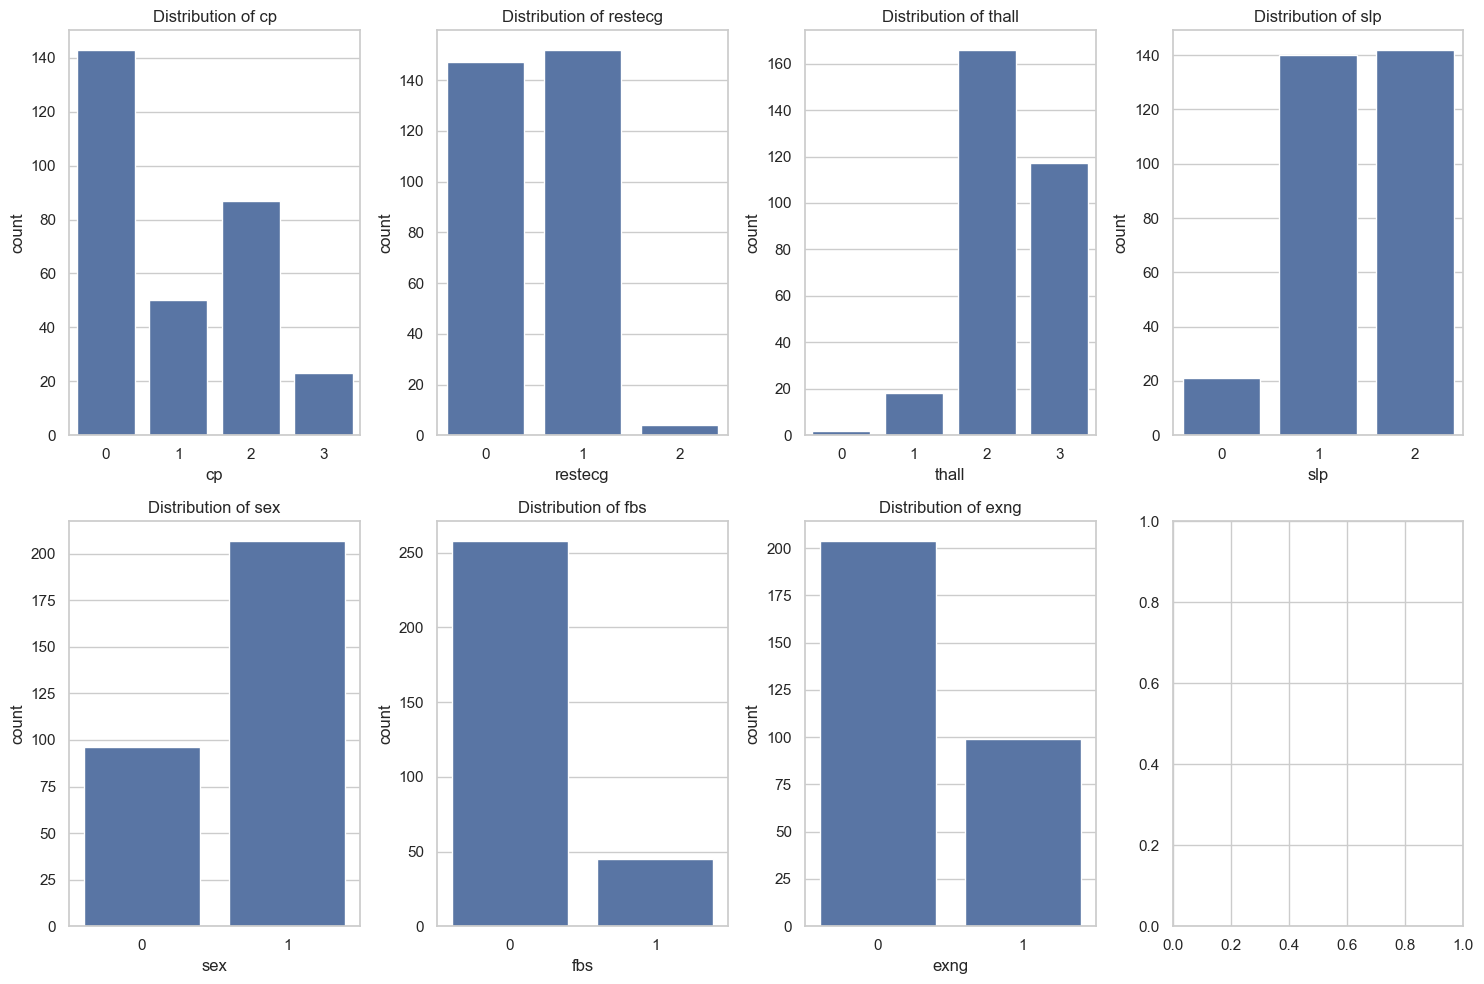

Plot for ordinal features


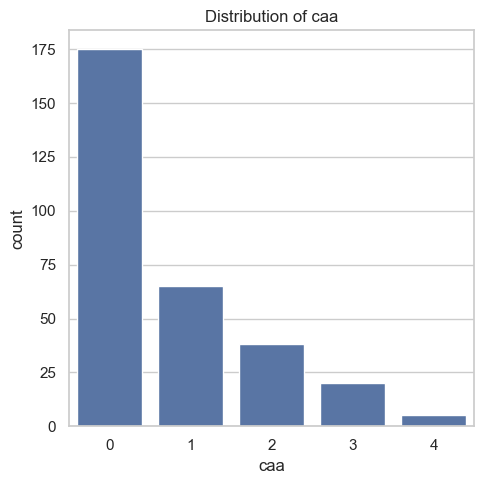

Plot for result feature


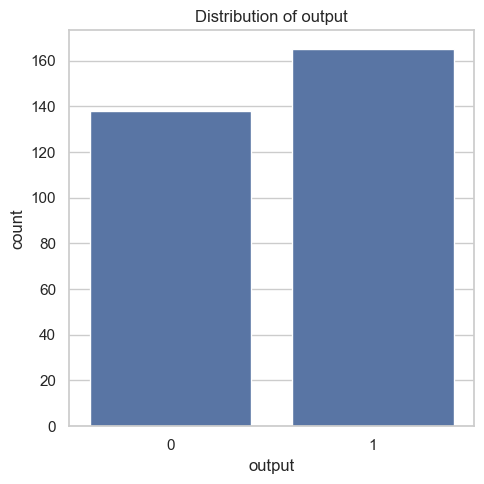

In [4]:
# numerical features
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# categorical features
categorical_features = ['cp', 'restecg', 'thall', 'slp', 'sex', 'fbs', 'exng']

# ordinal features
ordinal_features = ['caa']

# result feature
result_feature = ['output']

# Set the style of seaborn
sns.set(style="whitegrid")

# subplots for numerical features
print('Plots for numerical features')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data_training[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# subplots for categorical features
print('Plots for categorical features')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data_training, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# subplot for ordinal features
print('Plot for ordinal features')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.countplot(x='caa', data=data_training, ax=ax)
ax.set_title(f'Distribution of caa')

plt.tight_layout()
plt.show()

# subplot for result features
print('Plot for result feature')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.countplot(x='output', data=data, ax=ax)
ax.set_title(f'Distribution of output')

plt.tight_layout()
plt.show()

# Data Preprocessing

## Encoding

### OneHotEncoder

OneHotEncoder is a valid approach for categorical, non-ordinal variables. It transforms each categorical value into a new binary column, ensuring that models which require numerical input can utilize these categorical data effectively. This method is particularly beneficial for algorithms that do not inherently handle categorical data well. However, it's important to be cautious about the potential increase in dimensionality, which can lead to issues like the curse of dimensionality or increased computational complexity.

### MinMaxScaler

MinMaxScaler is used for numerical attributes and is crucial for features with different scales. It rescales the feature to a fixed range, typically 0 to 1. This scaling ensures that each feature contributes approximately proportionately to the final prediction. Without proper scaling, models that are sensitive to the scale of the input, such as neural networks and distance-based algorithms like k-NN, might perform poorly or converge slowly.

### OrdinalEncoder

OrdinalEncoder is suitable for ordinal attributes, which have a meaningful order or ranking among their values but do not have a consistent scale between these values. This encoder converts categorical values to a numeric array, preserving the order of the categories. It's vital for algorithms that can leverage the inherent order in the data, providing a more meaningful representation of these variables compared to OneHotEncoder.

## Encoding Application to Attributes

### OneHotEncoder Usage

- **Sex**: Binary categorical attribute; can be encoded into a single binary column.
- **Chest Pain (cp)**: Non-ordinal categorical attribute with multiple classes.
- **Fasting Blood Sugar (fbs)**: Binary categorical attribute.
- **Resting Electrocardiographic Results (restecg)**: Non-ordinal categorical attribute with multiple classes.
- **Exercise Induced Angina (exng)**: Binary categorical attribute.
- **Slope of the Peak Exercise ST Segment (slp)**: Non-ordinal categorical attribute with multiple classes.
- **Thalassemia (thall)**: Non-ordinal categorical attribute with multiple classes.

### MinMaxScaler Usage

- **Age**: Numerical attribute.
- **Resting Blood Pressure (trtbps)**: Numerical attribute.
- **Cholesterol (chol)**: Numerical attribute.
- **Maximum Heart Rate (thalachh)**: Numerical attribute.
- **ST Depression (oldpeak)**: Numerical attribute.

### OrdinalEncoder Usage

- **Number of Major Vessels (caa)**: Ordinal categorical attribute.


In [5]:
# Prepare the transformers
numeric_transformer = Pipeline([ ('scaler', MinMaxScaler()) ])
categorical_transformer = Pipeline([ ('onehot', OneHotEncoder()) ])
ordinal_transformer = Pipeline([ ('ordinal', OrdinalEncoder()) ])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)])

print("Scaled data:")
# data_preprocessed =pd.DataFrame(preprocessor.fit_transform(data_training))



# Function to apply transformations and retain column names
def preprocess_and_retain_column_names(data):
    # Apply transformations
    data_transformed = preprocessor.fit_transform(data)

    # Get feature names from OneHotEncoder
    # Use get_feature_names_out for newer versions of scikit-learn
    categorical_cols = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

    # Combine all feature names
    all_columns = numeric_features + list(categorical_cols) + ordinal_features

    # Create a new DataFrame with transformed data and column names
    data_preprocessed = pd.DataFrame(data_transformed, columns=all_columns)

    return data_preprocessed

# Apply the preprocessing function to your data
data_training_preprocessed = preprocess_and_retain_column_names(data_training)
data_preprocessed = preprocess_and_retain_column_names(data)



print('Check for negatives and dupes')
# Check for negative values
negatives = (data_training_preprocessed < 0).any()
# Check for duplicates
duplicates = data.duplicated().sum()


display(data_training_preprocessed, negatives, duplicates)

Scaled data:
Check for negatives and dupes


,age,trtbps,chol,thalachh,oldpeak,cp_0,cp_1,cp_2,cp_3,restecg_0,...,slp_0,slp_1,slp_2,sex_0,sex_1,fbs_0,fbs_1,exng_0,exng_1,caa
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
300,0.812500,0.471698,0.152968,0.534351,0.548387,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0
301,0.583333,0.339623,0.011416,0.335878,0.193548,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


age          False
trtbps       False
chol         False
thalachh     False
oldpeak      False
cp_0         False
cp_1         False
cp_2         False
cp_3         False
restecg_0    False
restecg_1    False
restecg_2    False
thall_0      False
thall_1      False
thall_2      False
thall_3      False
slp_0        False
slp_1        False
slp_2        False
sex_0        False
sex_1        False
fbs_0        False
fbs_1        False
exng_0       False
exng_1       False
caa          False
dtype: bool

1

## Needed functions from notebooks

In [6]:
# confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

# roc curve
def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) 
    tprs = []
    aucs = []    
    for train_indices, test_indices in cv.split(data, target):
        # Use .iloc for positional indexing
        train_data, train_target = data.iloc[train_indices], target.iloc[train_indices]
        estimator.fit(train_data, train_target)

        test_data, test_target = data.iloc[test_indices], target.iloc[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 
        aucs.append(auc(fpr, tpr))
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    return mean_fpr, mean_tpr, mean_auc, std_auc

# Classification
# Pipelines

## KNN Pipeline

KNN, or k-Nearest Neighbors, is a simple yet effective model that predicts the class of a data point based on the classes of its 'k' closest neighbors. It's commonly used for classification tasks where the relationship between data points is important. In our project, KNN can be particularly useful for scenarios where similar data points imply similar outcomes.

## Naive Bayes

Naive Bayes classifiers are based on applying Bayes' theorem with strong independence assumptions between the features. It works well with text data or when the features are conditionally independent. This model can be efficiently used in our project for classifying data with distinct feature distributions.

## Random Forest

Random Forest operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes of individual trees. It's robust against overfitting and works well with both categorical and numerical data, making it suitable for diverse datasets in our project.

## Decision Tree

Decision Trees split the data based on certain conditions. It's straightforward and easy to interpret, which makes it ideal for decision-making processes in our project. However, they can be prone to overfitting, especially if the tree grows too deep.

## Neural Network (MLP Classifier)

Multi-Layer Perceptrons (MLP) are a type of neural network known for their versatility in handling complex patterns in data. They are suitable for both regression and classification tasks, making them a valuable tool for projects requiring advanced pattern recognition.

## Gradient Boosting Classifier

This model builds an ensemble of weak prediction models, typically decision trees, to create a robust predictor. Gradient Boosting works well for unbalanced data, which can be particularly beneficial in projects dealing with imbalanced datasets.

## Support Vector Machines (SVM)

SVMs are powerful classifiers that work well in high-dimensional spaces and are effective with non-linear decision boundaries, thanks to different kernel tricks. They're ideal for complex classification problems in our project, especially where linear separation is not feasible.


## Analyze Dependency of Dataset

Next, we analyze the dependency of each attribute to the target to decide the most suitable Naive Bayes model for this dataset

Continuous Columns: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
Categorical Columns: ['cp_3', 'cp_2', 'cp_1', 'cp_0', 'restecg_0', 'restecg_1', 'restecg_2', 'thall_1', 'thall_2', 'thall_3', 'thall_0', 'slp_0', 'slp_2', 'slp_1', 'sex_1', 'sex_0', 'fbs_1', 'fbs_0', 'exng_0', 'exng_1']

Average Mutual Information:
Continuous Features: 0.06461938249852676
Categorical Features: 0.04583312847684813

Average Absolute Correlation:
Continuous Features: 0.17223654251507692
Categorical Features: 0.17076518727104947


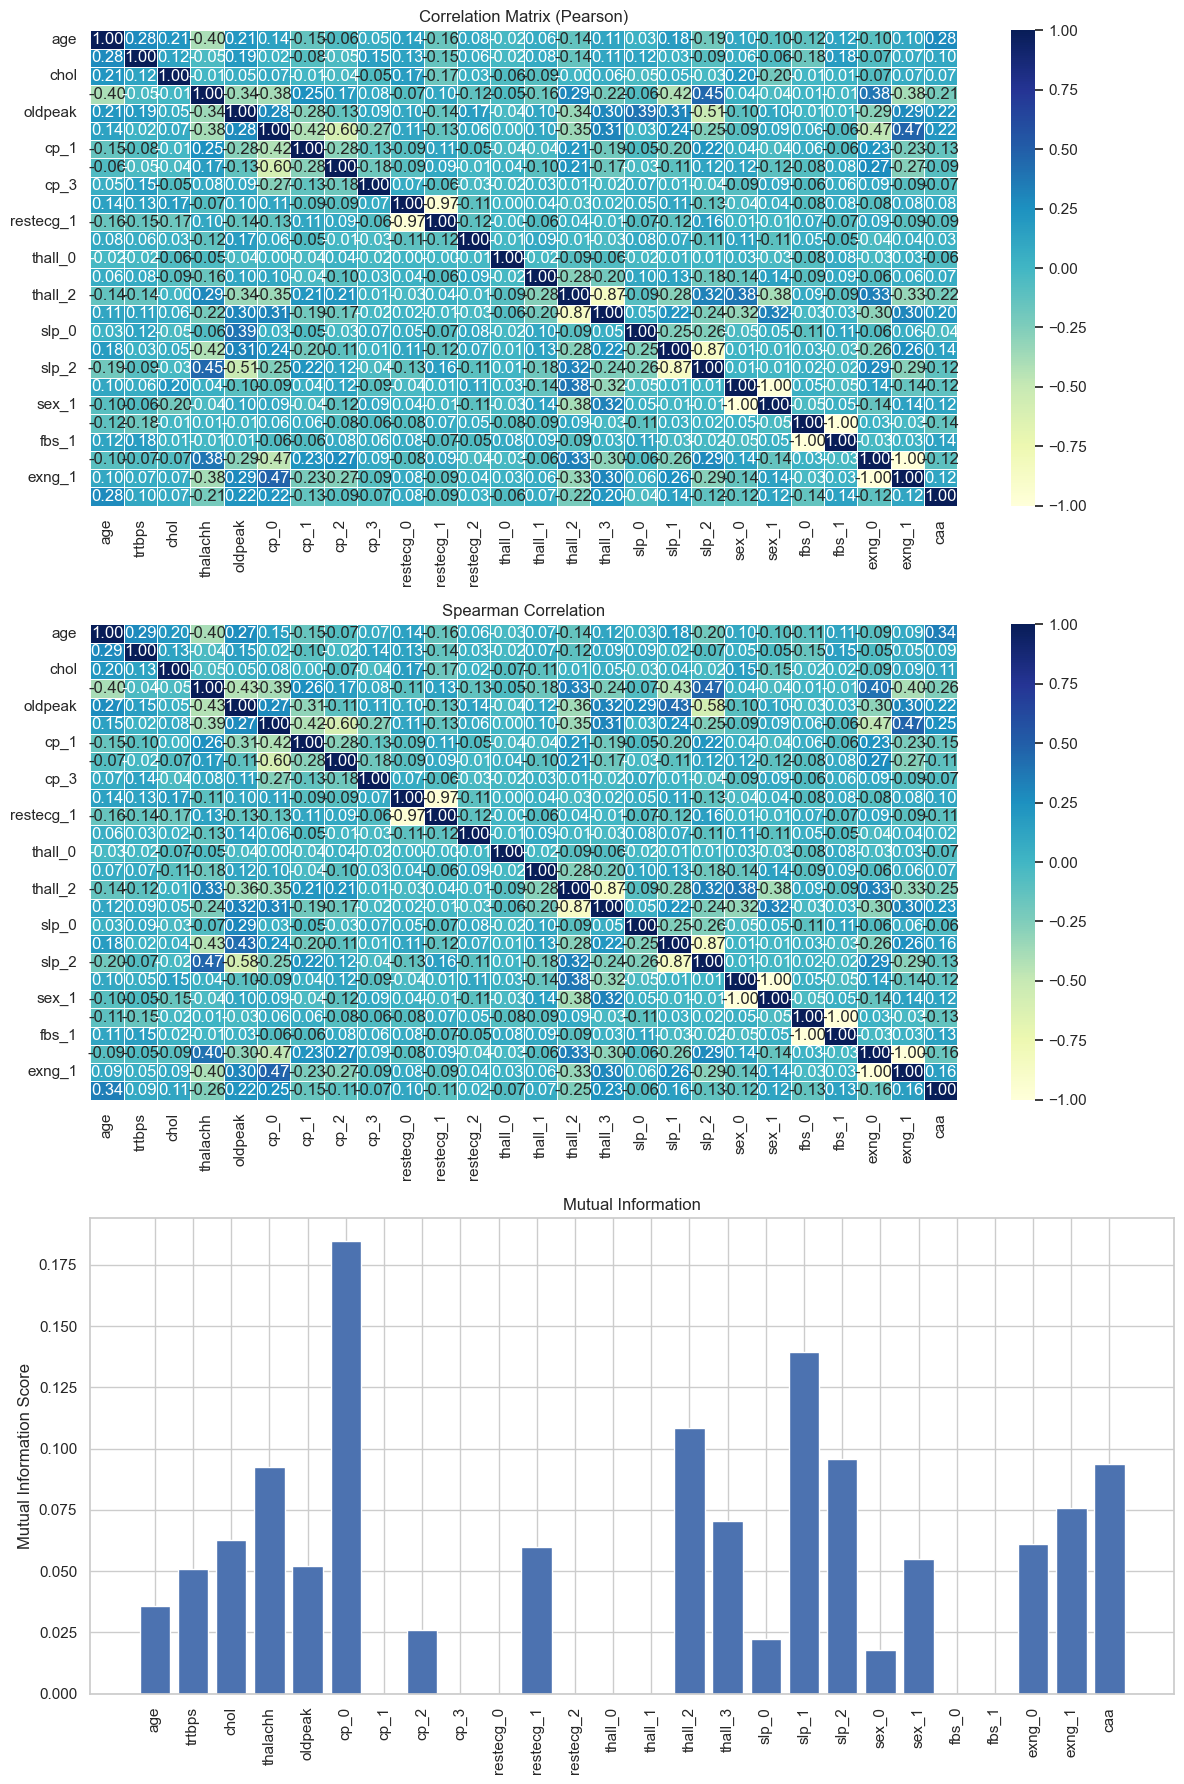

In [7]:
# Continuous columns (numeric and ordinal)
continuous_cols = numeric_features + ordinal_features

# Dynamically generate categorical column names after one-hot encoding
categorical_cols = []
for feature in categorical_features:
    unique_values = data_training[feature].unique()
    transformed_cols = [f"{feature}_{value}" for value in unique_values]
    categorical_cols.extend(transformed_cols)

print("Continuous Columns:", continuous_cols)
print("Categorical Columns:", categorical_cols)

# Correlation matrix
corr_matrix = data_preprocessed.corr()

# Spearman correlation
spearman_corr = data_preprocessed.corr(method='spearman')

# Mutual Information
mutual_info = mutual_info_regression(data_training_preprocessed, target_data, random_state=42)
mutual_info = pd.Series(mutual_info)
mutual_info.index = data_training_preprocessed.columns

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # Adjusted figsize for better readability

# Plot correlation matrix
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu", 
            ax=axs[0])  # axs[0] refers to the first subplot
axs[0].set_title('Correlation Matrix (Pearson)')

# Plot Spearman correlation
sns.heatmap(spearman_corr, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu", 
            ax=axs[1])  # axs[1] refers to the second subplot
axs[1].set_title('Spearman Correlation')

# Plot Mutual Information
axs[2].bar(mutual_info.index, mutual_info)  # axs[2] refers to the third subplot
plt.xticks(rotation=90)
axs[2].set_ylabel('Mutual Information Score')
axs[2].set_title('Mutual Information')

plt.tight_layout()  # Adjust layout for better spacing

# Calculations for mutual information and correlations
avg_mi_continuous = mutual_info[continuous_cols].mean()
avg_mi_categorical = mutual_info[categorical_cols].mean()

avg_corr_continuous = corr_matrix[continuous_cols].abs().mean().mean()
avg_corr_categorical = corr_matrix[categorical_cols].abs().mean().mean()

# Printing the results
print("\nAverage Mutual Information:")
print("Continuous Features:", avg_mi_continuous)
print("Categorical Features:", avg_mi_categorical)
print("\nAverage Absolute Correlation:")
print("Continuous Features:", avg_corr_continuous)
print("Categorical Features:", avg_corr_categorical)

plt.show()

#### Interpretation of correlation
##### Average Mutual Information Scores

- Continuous Features (0.0646): This score indicates a moderate level of mutual information for continuous features with the target variable. It suggests that these features have some, but not strong, predictive power.

- Categorical Features (0.0458): A lower mutual information score for categorical features compared to continuous ones implies that, on average, categorical features might have less predictive power regarding the target variable.

##### Average Absolute Correlation

- Continuous Features (0.1722): The average absolute correlation for continuous features is moderate. This indicates some level of linear relationship with the target, but it is not particularly strong.

- Categorical Features (0.1708): Similar to continuous features, the average absolute correlation for categorical features is moderate. This suggests a comparable level of linear relationship with the target.

##### Overall Assessment

The results show a balanced and thoughtful approach to feature categorization and preprocessing, crucial for model performance. However, the mutual information and correlation scores suggest that while there is some relationship between the features and the target, it may not be particularly strong. This could mean that the target variable is influenced by complex or non-linear relationships not fully captured by these metrics.

In summary, the approach is methodologically sound, but the moderate scores indicate that feature engineering or the inclusion of additional relevant features could potentially enhance model performance. Additionally, considering models that capture non-linear relationships might be beneficial given the nature of the data.


### Implementation of Pipelines


#### K-nearest Neighbor (KNN)
**Parameters:**

- `n_neighbors`: The number of neighbors to consider when making predictions. Default is 5.
- `weights`: The weight function used in prediction. Options include "uniform" (all neighbors have equal weight) and "distance" (closer neighbors have greater influence). Default is "uniform".
- `algorithm`: The algorithm used to compute the nearest neighbors. Options include "auto," "ball_tree," "kd_tree," and "brute." Default is "auto."
- `leaf_size`: The number of points at which the algorithm switches to brute-force search. Default is 30.
- `p`: The power parameter for the Minkowski distance metric. When `p=2`, it corresponds to the Euclidean distance; when `p=1`, it corresponds to the Manhattan distance. Default is 2.
- `metric`: The distance metric used for computing the neighbors. Options include "minkowski," "euclidean," "manhattan," and others, depending on the value of `p`. Default is "minkowski."
- `metric_params`: Additional keyword arguments for the chosen distance metric function. Default is None.
- `n_jobs`: The number of CPU cores to use for parallel processing. Default is None, meaning all available CPU cores are used.

#### Naive Bayes (GaussianNB)
**Parameters:**

- `var_smoothing`: A small portion of the largest variance of all features that is added to variances for calculation stability.

#### Naive Bayes (MultinomialNB)
**Parameters:**

- `alpha`: Additive (Laplace/Lidstone) smoothing parameter.

#### Random Forest
**Parameters:**

- `criterion`: The function to measure the quality of a split.
- `max_depth`: The maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.

#### Decision Tree
**Parameters:**

- `criterion`: The function to measure the quality of a split.
- `max_depth`: The maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.

#### Neural Network (MLP Classifier)
**Parameters:**

- `hidden_layer_sizes`: The number of neurons in the hidden layers.
- `activation`: Activation function for the hidden layer.
- `solver`: The solver for weight optimization.
- `alpha`: L2 penalty (regularization term) parameter.
- `learning_rate`: Learning rate schedule for weight updates.

#### Gradient Boosting Classifier
**Parameters:**

- `n_estimators`: The number of boosting stages to be run.
- `learning_rate`: Learning rate shrinks the contribution of each tree.
- `max_depth`: The maximum depth of the individual regression estimators.

#### Support Vector Machines (SVM)
**Parameters:**

- `C`: Regularization parameter.
- `gamma`: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
- `kernel`: Specifies the kernel type to be used in the algorithm.


---------------------------------------------------------------------------------------------


## Oversampling in Our Data Pipeline

## Rationale for Oversampling

Despite the relatively balanced distribution of our target class, we have decided to implement oversampling in our data processing pipeline. This decision is based on the following considerations:

1. **Inherent Class Imbalance:** Although the imbalance in our target class is not severe, even a slight imbalance can lead to biased models, particularly in algorithms sensitive to class distribution, like K-Nearest Neighbors (KNN).

2. **Enhancing Model Robustness:** By introducing a more balanced class distribution through oversampling, we aim to increase the robustness of our model, ensuring that it performs well across all classes.

## Oversampling with Limited Data

One of the critical aspects of our scenario is the limited size of our dataset, with only around 300 entries. In light of this, further oversampling merits consideration:

1. **Mitigating Small Sample Size:** With a dataset of just 300 entries, our model's ability to learn and generalize can be limited. Oversampling in this context is not just a matter of balancing classes, but also of augmenting the dataset to provide the model with more examples to learn from.

2. **Custom Oversampling Strategy:** Given our specific needs and the small size of the dataset, we will explore custom oversampling strategies. These may include setting specific ratios in the RandomOverSampler or using advanced techniques like SMOTE to generate synthetic yet plausible samples.

## Moving Forward

The implementation of oversampling, particularly in a small dataset, requires careful monitoring to avoid overfitting. Initially, we will oversample the data until a balanced distribution is achieved. Afterward, we will explore more aggressive oversampling techniques if necessary.

We will rigorously validate our model using cross-validation techniques, ensuring that oversampling is applied correctly during the training phase and not contaminating our validation sets. This approach will help us strike a balance between addressing class imbalance, enhancing our dataset, and maintaining the integrity of our model's evaluation.



In [8]:
pipelines = {}

# define wished random state
rs = 42

# knn pipeline
knn_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', KNeighborsClassifier())
    ])

# knn parameter grid
knn_pipeline_param_grid = {
    'estimator__n_neighbors': list(range(1, 31)),  # Wider range for number of neighbors
    'estimator__weights': ['uniform', 'distance'],  # Whether to weight neighbors equally or by distance
    'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute nearest neighbors
    'estimator__leaf_size': [10, 30, 50, 70, 90],  # Leaf size passed to BallTree or KDTree
    'estimator__p': [1, 2]  # Power parameter for the Minkowski metric
}

pipelines['knn'] = [knn_pipeline, knn_pipeline_param_grid]


# Naive Bayes pipeline GaussianNB
nb_gau_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), # Uncomment and adjust if preprocessing is required
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', GaussianNB())
])

# GaussianNB parameter grid
nb_gau_pipeline_param_grid = {
    'estimator__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

pipelines['nb_gaussian'] = [nb_gau_pipeline, nb_gau_pipeline_param_grid]


# Naive Bayes pipeline MultinomialNB
nb_multi_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), # Uncomment and adjust if preprocessing is required
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', MultinomialNB())
])

# MultinomialNB parameter grid
nb_multi_pipeline_param_grid = {
    'estimator__alpha': [0.0, 0.5, 1.0, 1.5, 2.0],  # Smoothing parameter
}

pipelines['nb_multinomial'] = [nb_multi_pipeline, nb_multi_pipeline_param_grid]


# Random Forest
r_forest_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', RandomForestClassifier(random_state=rs)) ])

# Random Forest parameter grid
r_forest_pipeline_param_grid = {
    'estimator__criterion': ['gini', 'entropy'], 
    'estimator__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, None],
    'estimator__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

pipelines['r_forest'] = [r_forest_pipeline, r_forest_pipeline_param_grid]


# Decision Tree
d_tree_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', DecisionTreeClassifier(random_state=rs)) ])

# Decision Tree parameter grid
d_tree_pipeline_param_grid = {
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, None],
    'estimator__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

pipelines['d_tree'] = [d_tree_pipeline, d_tree_pipeline_param_grid]


# Neural Network
nn_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', MLPClassifier(max_iter=400, random_state=rs)) ])

# Neural Network parameter grid
nn_pipeline_param_grid = {
    'estimator__hidden_layer_sizes': [(50, 50, 50), (100, 100, ), (200, )],
    'estimator__activation': ['tanh', 'relu'],
    'estimator__solver': ['sgd', 'adam'],
    'estimator__alpha': [0.0001, 0.001, 0.01, 0.05, 0.1],
    'estimator__learning_rate': ['constant','adaptive'],
}

pipelines['nn'] = [nn_pipeline, nn_pipeline_param_grid]


# Gradient Boosting
grad_boost_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', GradientBoostingClassifier(random_state=rs)) ])

# Gradient Boosting parameter grid
grad_boost_param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
}

pipelines['grad_boost'] = [grad_boost_pipeline, grad_boost_param_grid]


# Support Vector Machines (SVM)
svm_pipeline = Pipeline([ 
    ('preprocessing', preprocessor), 
    ('balancing', RandomOverSampler(random_state=rs, sampling_strategy='auto')), # auto parameter fills up minority to majority
    ('estimator', SVC(random_state=rs, probability=True)) ])

#  Support Vector Machines parameter grid
svm_param_grid = {
    'estimator__C': [0.1, 1, 10, 100, 200, 300],  # Regularization parameter
    'estimator__gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'estimator__kernel': ['rbf', 'linear', 'poly']  # Specifies the kernel type to be used in the algorithm
}

pipelines['svm'] = [svm_pipeline, svm_param_grid]


# cross val
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=rs)

## Assumptions for Optimizing Heart Attack Prediction

In our heart attack prediction project, it's crucial to minimize false negatives (predicting 'no heart attack' when there is one). This is because such errors could have serious health implications. On the other hand, false positives (predicting a heart attack when there isn't one) may lead to unnecessary tests or treatments but are generally less harmful than missing an actual heart attack.

The confusion matrix for our prediction model is outlined as follows:

| Actual \ Predicted    | No Heart Attack (0) | Heart Attack (1)    |
|-----------------------|---------------------|---------------------|
| No Heart Attack (0)   | True Negative (TN)  | False Positive (FP) |
| Heart Attack (1)      | False Negative (FN) | True Positive (TP)  |

We denote the cost of a false negative as (C_FN) and the cost of a false positive as (C_FP). The cost of true positives (C_TP) and true negatives (C_TN) can be set to zero or a lower value, as these are correct predictions. Therefore, the total cost of the confusion matrix can be calculated as:

Total Cost = C_FN * FN + C_FP * FP

Given the critical nature of missing a heart attack, (C_FN) should be significantly higher than (C_FP). For instance, we might set (C_FN = 10) and (C_FP = 1).

In [9]:
# cost function
def cost_function(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred)
    cost = cm[0][1] * 1 + cm[1][0] * 100
    return cost

# create a scorer for the grid search
cost_score = make_scorer(cost_function, greater_is_better=False)

## Gridsearch

In [10]:
def run_gridsearch(pipelines):
    global data_training, target_data, stratified_10_fold_cv, cost_score
    
    costs = {}
    best_models = {}
    
    classes = target_data.unique()
    
    for key, value in pipelines.items():
        print('-------------------------------------')
        print(f'Grid search for {key}')
        print('-------------------------------------')
        
        # Create grid search object with specified parameter grid
        grid_search = GridSearchCV(value[0], value[1], cv=stratified_10_fold_cv, scoring=cost_score)
        
        # cross-validate
        prediction = cross_val_predict(grid_search, data_training, target_data, cv=stratified_10_fold_cv, n_jobs=-1)
        
        # calculate costs
        cm = confusion_matrix(target_data, prediction)
        cost = cost_function(target_data, prediction)
        acc = accuracy_score(target_data, prediction)
        recall = recall_score(target_data, prediction)
        
        # remember costs
        costs[key] = cost
        
        print("Optimised {} with accuracy of {}, cost {} and recall of {}".format(key, round(acc, 2), cost, round(recall, 2)))
        
        # Fit grid search to the data
        grid_search.fit(data_training, target_data)
        
        # Best parameters
        best_parameters = grid_search.best_params_
        best_score = grid_search.best_score_
        
        # save best model
        best_models[key] = grid_search.best_estimator_
        
        print("\n Best Parameters: ", best_parameters)
        print("Best Score: ", best_score, '\n')
        
        print(classification_report(target_data, prediction))
        
        # plot_confusion_matrix(cm, classes=classes, title='{} Classifier'.format(key))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title('{} Confusion Matrix'.format(key))

        plt.show()
        
    return costs, best_models

## ROC Curve

In [11]:
def plot_roc_curve(best_models):
    # colors for ploting
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
              'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 
              'lime', 'lavender', 'turquoise', 'darkgreen', 'beige', 'maroon']
    
    # Create a color iterator
    color_iter = itertools.cycle(colors)
    
    # Plot the line for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)
    
    for name, model in best_models.items():
        color = next(color_iter)
        mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(stratified_10_fold_cv, model, data_training, target_data, 1)
        plt.plot(mean_fpr, mean_tpr, label=name, color=color)
    
    # Show the plot with legends and labels
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Different Classifiers")
    plt.legend()
    plt.show()

### Normal Setup
Lets run Gridsearch with the pipelines how we set them up

-------------------------------------
Grid search for knn
-------------------------------------


Optimised knn with accuracy of 0.82, cost 2826 and recall of 0.83

 Best Parameters:  {'estimator__algorithm': 'auto', 'estimator__leaf_size': 10, 'estimator__n_neighbors': 19, 'estimator__p': 1, 'estimator__weights': 'distance'}
Best Score:  -232.3 

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       138
           1       0.84      0.83      0.84       165

    accuracy                           0.82       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



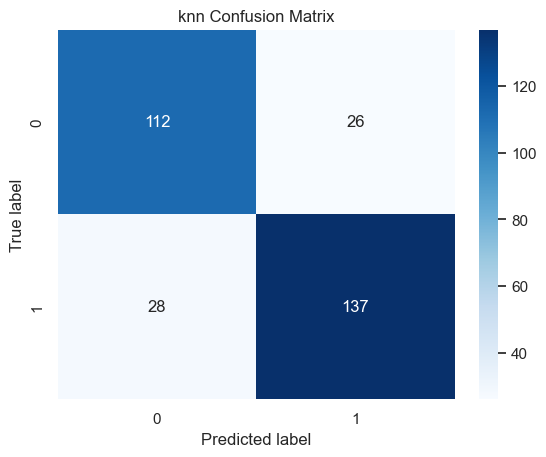

-------------------------------------
Grid search for nb_gaussian
-------------------------------------
Optimised nb_gaussian with accuracy of 0.79, cost 2936 and recall of 0.82

 Best Parameters:  {'estimator__var_smoothing': 0.0001}
Best Score:  -283.1 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       138
           1       0.79      0.82      0.81       165

    accuracy                           0.79       303
   macro avg       0.78      0.78      0.78       303
weighted avg       0.79      0.79      0.78       303



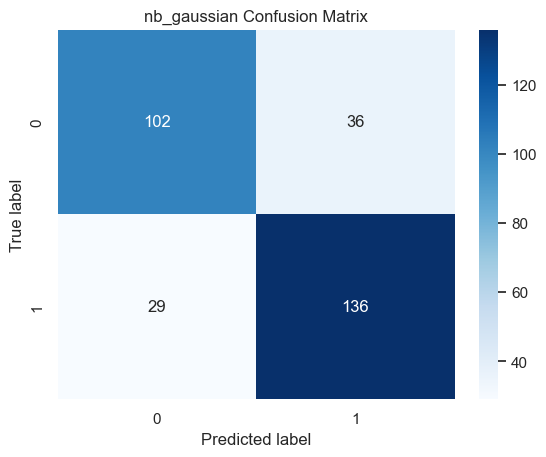

-------------------------------------
Grid search for nb_multinomial
-------------------------------------
Optimised nb_multinomial with accuracy of 0.82, cost 3125 and recall of 0.81


c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` 


 Best Parameters:  {'estimator__alpha': 1.5}
Best Score:  -302.3 

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       138
           1       0.84      0.81      0.83       165

    accuracy                           0.82       303
   macro avg       0.81      0.82      0.81       303
weighted avg       0.82      0.82      0.82       303



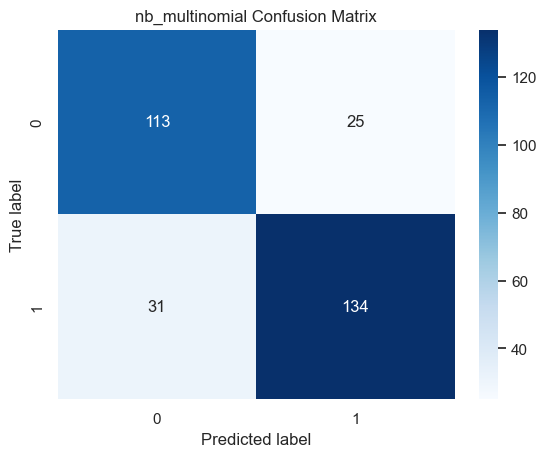

-------------------------------------
Grid search for r_forest
-------------------------------------
Optimised r_forest with accuracy of 0.83, cost 2130 and recall of 0.87

 Best Parameters:  {'estimator__criterion': 'entropy', 'estimator__max_depth': 4, 'estimator__min_samples_split': 4}
Best Score:  -202.5 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       138
           1       0.83      0.87      0.85       165

    accuracy                           0.83       303
   macro avg       0.83      0.83      0.83       303
weighted avg       0.83      0.83      0.83       303



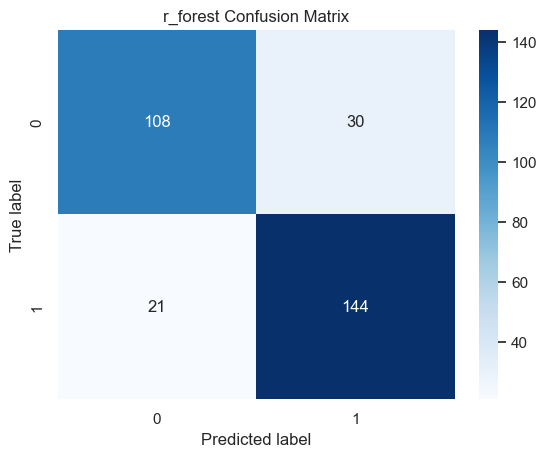

-------------------------------------
Grid search for d_tree
-------------------------------------
Optimised d_tree with accuracy of 0.74, cost 4038 and recall of 0.76

 Best Parameters:  {'estimator__criterion': 'gini', 'estimator__max_depth': 12, 'estimator__min_samples_split': 3}
Best Score:  -304.2 

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       138
           1       0.77      0.76      0.76       165

    accuracy                           0.74       303
   macro avg       0.74      0.74      0.74       303
weighted avg       0.74      0.74      0.74       303



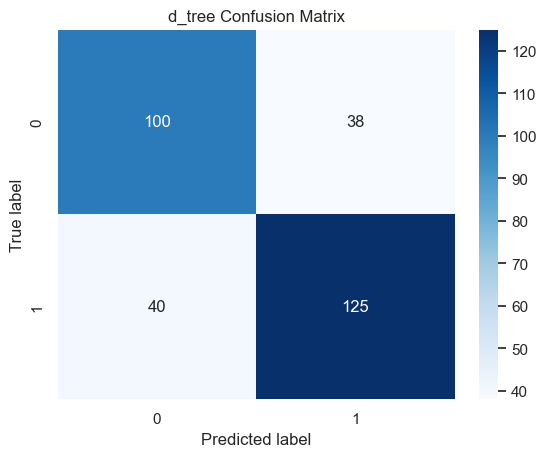

-------------------------------------
Grid search for nn
-------------------------------------
Optimised nn with accuracy of 0.8, cost 2734 and recall of 0.84


c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and 


 Best Parameters:  {'estimator__activation': 'tanh', 'estimator__alpha': 0.05, 'estimator__hidden_layer_sizes': (200,), 'estimator__learning_rate': 'constant', 'estimator__solver': 'adam'}
Best Score:  -222.5 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       138
           1       0.80      0.84      0.82       165

    accuracy                           0.80       303
   macro avg       0.80      0.79      0.80       303
weighted avg       0.80      0.80      0.80       303



c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


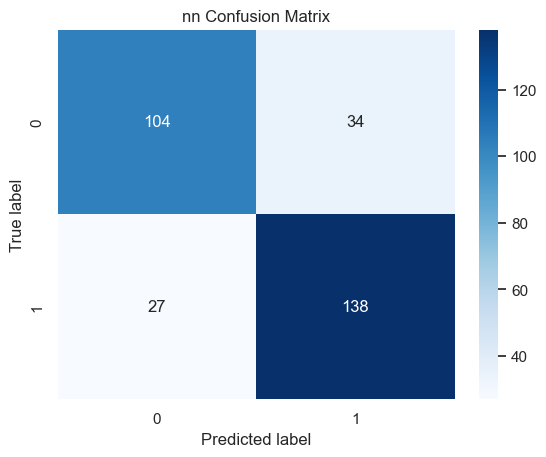

-------------------------------------
Grid search for grad_boost
-------------------------------------
Optimised grad_boost with accuracy of 0.83, cost 2231 and recall of 0.87

 Best Parameters:  {'estimator__learning_rate': 0.1, 'estimator__max_depth': 2, 'estimator__n_estimators': 50}
Best Score:  -222.6 

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       138
           1       0.82      0.87      0.84       165

    accuracy                           0.83       303
   macro avg       0.83      0.82      0.82       303
weighted avg       0.83      0.83      0.82       303



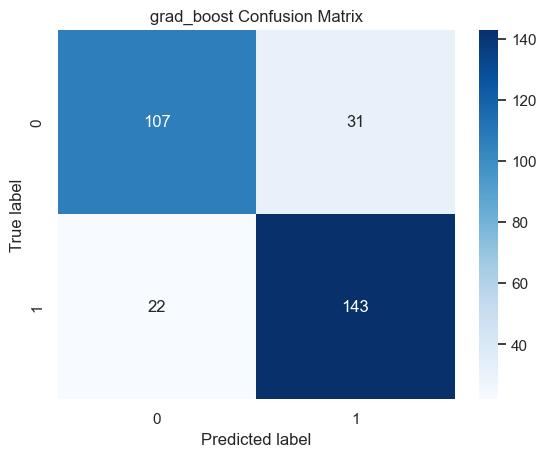

-------------------------------------
Grid search for svm
-------------------------------------
Optimised svm with accuracy of 0.65, cost 2086 and recall of 0.88

 Best Parameters:  {'estimator__C': 0.1, 'estimator__gamma': 0.01, 'estimator__kernel': 'poly'}
Best Score:  -22.0 

              precision    recall  f1-score   support

           0       0.72      0.38      0.50       138
           1       0.63      0.88      0.73       165

    accuracy                           0.65       303
   macro avg       0.67      0.63      0.61       303
weighted avg       0.67      0.65      0.62       303



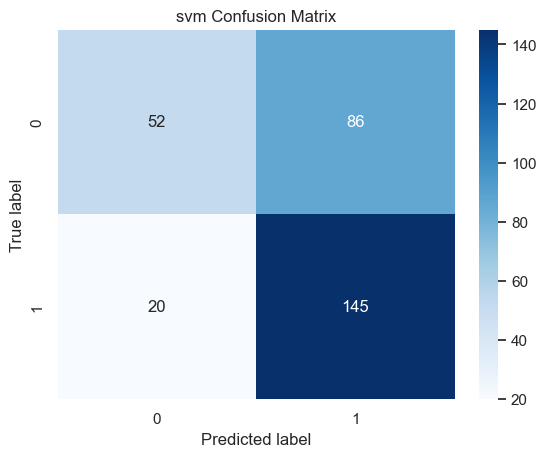

{'svm': 2086,
 'r_forest': 2130,
 'grad_boost': 2231,
 'nn': 2734,
 'knn': 2826,
 'nb_gaussian': 2936,
 'nb_multinomial': 3125,
 'd_tree': 4038}

c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\I573015\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and 

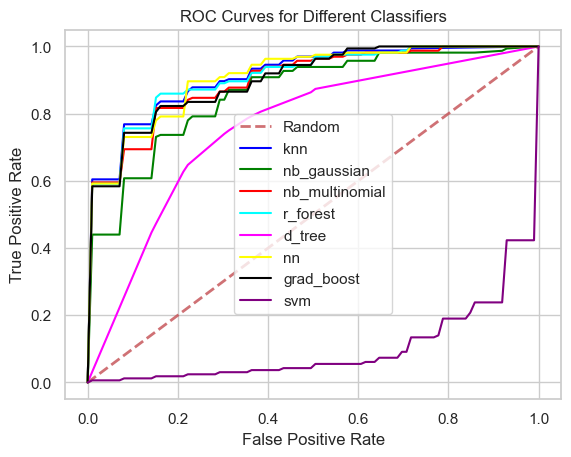

In [12]:
normal_setup = {}

normal_setup['costs'], normal_setup['best_models'] = run_gridsearch(pipelines)

# rating after cost score
costs = dict(sorted(normal_setup['costs'].items(), key=lambda item: item[1]))

display(costs)
plot_roc_curve(normal_setup['best_models'])

## Oversampling
Because our target class balance is not bad. Oversampling seems risky because of overfitting. But maybe we will see a difference when oversampling not just to balance out but to have more enries. Our dataset only contains 300 entries and I could be difficult for models to detect komplex problems with that litle data.